<a href="https://colab.research.google.com/github/dannywinter/2025_ML_hws/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
labels = ["T-shirt/top(T恤)", "Trouser(褲子)", "Pullover(套衫)",
      "Dress(裙子)", "Coat(外套)", "Sandal(凉鞋)", "Shirt(汗衫)",
      "Sneaker(運動鞋)", "Bag(包)", "Ankle boot(踝靴)"]

x_train.shape: (60000, 784)
x_test.shape: (10000, 784)


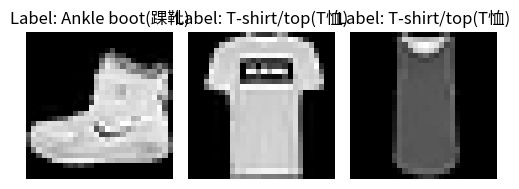

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# 安裝中文字型：思源黑體（Noto Sans CJK TC）
!wget -qO /usr/share/fonts/truetype/NotoSansCJKtc-Regular.otf https://github.com/googlefonts/noto-cjk/raw/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Regular.otf

# 載入字型到 matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fm.fontManager.addfont('/usr/share/fonts/truetype/NotoSansCJKtc-Regular.otf')
plt.rcParams['font.family'] = 'Noto Sans CJK TC'


# 標籤對應名稱
labels = ["T-shirt/top(T恤)", "Trouser(褲子)", "Pullover(套衫)",
          "Dress(裙子)", "Coat(外套)", "Sandal(涼鞋)", "Shirt(汗衫)",
          "Sneaker(運動鞋)", "Bag(包)", "Ankle boot(踝靴)"]

# 讀取資料
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 正規化與扁平化
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255

# One-hot 編碼
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 顯示維度
print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)

# 顯示 3 張樣本
plt.figure(figsize=(5, 2))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {labels[y_train[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train_cat,
                    batch_size=128,
                    epochs=30,
                    validation_split=0.2)


Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6812 - loss: 0.8875 - val_accuracy: 0.8414 - val_loss: 0.4255
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8357 - loss: 0.4597 - val_accuracy: 0.8568 - val_loss: 0.3896
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8509 - loss: 0.4028 - val_accuracy: 0.8708 - val_loss: 0.3545
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8612 - loss: 0.3764 - val_accuracy: 0.8764 - val_loss: 0.3351
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8668 - loss: 0.3606 - val_accuracy: 0.8797 - val_loss: 0.3359
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8771 - loss: 0.3366 - val_accuracy: 0.8815 - val_loss: 0.3323
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8777 - loss: 0.3355 - val_accuracy: 0.8773 - val_loss: 0.3322
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8826 - loss: 0.3202 - val_accuracy: 0.

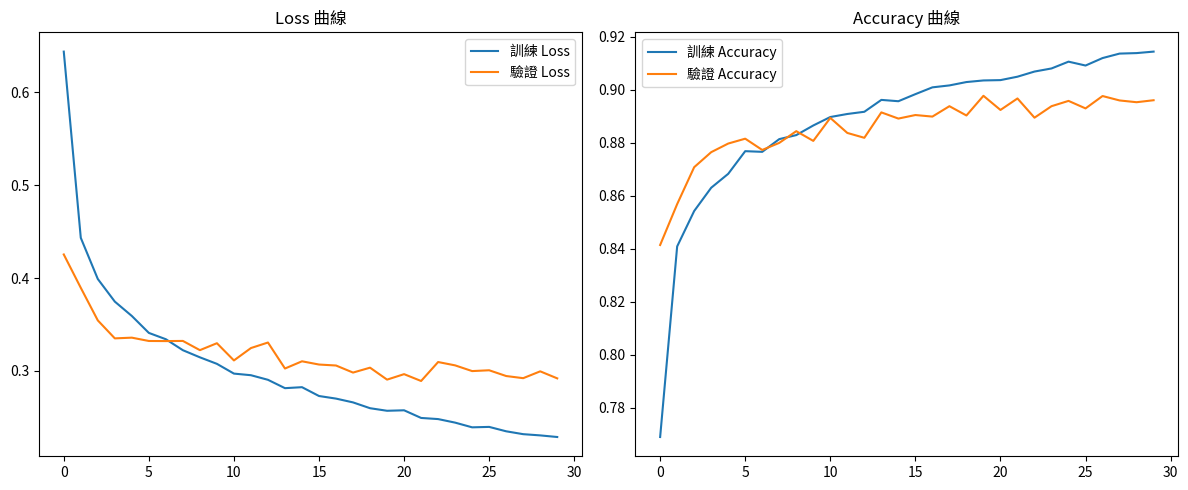

In [24]:
# 繪製訓練過程
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='訓練 Loss')
plt.plot(history.history['val_loss'], label='驗證 Loss')
plt.title("Loss 曲線")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='訓練 Accuracy')
plt.plot(history.history['val_accuracy'], label='驗證 Accuracy')
plt.title("Accuracy 曲線")
plt.legend()

plt.tight_layout()
plt.show()


In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"測試資料準確率 = {test_acc:.4f}")


測試資料準確率 = 0.8906


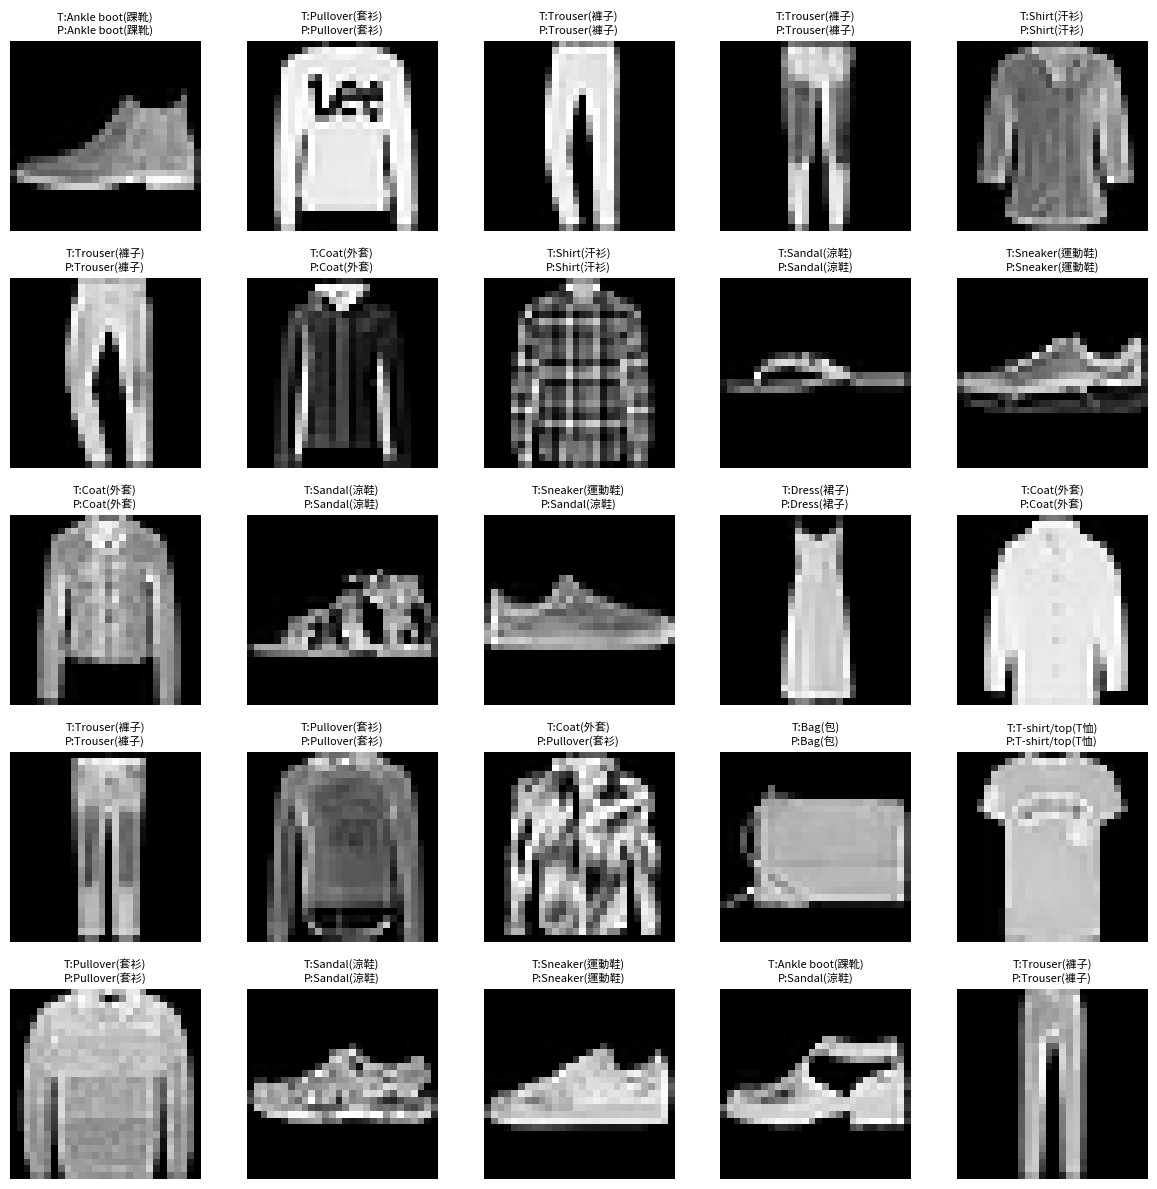

In [26]:
plt.figure(figsize=(12, 12))  # 調整圖的大小，避免太擠
for i in range(25):
    plt.subplot(5, 5, i + 1)  # 改成 5 行 5 列
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    true = labels[y_test[i]]
    pred = labels[y_pred_label[i]]
    plt.title(f"T:{true}\nP:{pred}", fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [19]:
import pandas as pd
import numpy as np

# 預測（這裡假設前面已經做過 model.predict）
prediction = model.predict(x_test)  # shape: (10000, 10)
predicted_labels = np.argmax(prediction, axis=1)  # 預測類別
y_test_label = y_test  # 真實類別

# 混淆矩陣（數字版本）
conf_matrix = pd.crosstab(y_test_label, predicted_labels,
                          rownames=['真實類別'],
                          colnames=['預測類別'])

conf_matrix


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


預測類別,0,1,2,3,4,5,6,7,8,9
真實類別,,,,,,,,,,
0,833,4,16,30,7,0,103,0,7,0
1,1,976,1,17,3,0,1,0,1,0
2,13,1,748,12,136,0,88,0,2,0
3,15,12,7,909,34,0,19,0,4,0
4,0,0,63,31,840,0,63,0,3,0
5,0,0,0,0,0,973,0,19,1,7
6,116,2,62,30,56,0,719,0,15,0
7,0,0,0,0,0,10,0,965,0,25
8,3,0,2,3,6,1,4,4,977,0


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [22]:
model.save("fashion_mnist_dnn_model.keras")
